In [7]:
!pip install deap

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools

In [9]:
# --- Initialize the parameters ---
num_locations = 10  # Number of locations (excluding depot)
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)  # Depot location at the center
num_vehicles = 3  # Number of vehicles

In [10]:
# --- Define the fitness evaluation function (Task 5) ---
def calculate_distance(p1, p2):
    """Helper function to calculate Euclidean distance between two points."""
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [11]:
def evalVRP(individual):
    """Evaluates the total distance and workload balance (standard deviation)."""
    # Split individual into truck routes (based on number of vehicles)
    truck_routes = np.array_split(individual, num_vehicles)

    total_distance = 0
    truck_distances = []

    for route in truck_routes:
        distance = 0
        prev_location = depot

        # Calculate the distance for the route (from depot to locations and back)
        for idx in route:
            distance += calculate_distance(prev_location, locations[idx])
            prev_location = locations[idx]

        # Return to depot
        distance += calculate_distance(prev_location, depot)

        truck_distances.append(distance)
        total_distance += distance

    # Calculate the standard deviation of distances (workload balance)
    distance_std_dev = np.std(truck_distances)

    return total_distance, distance_std_dev

In [12]:
# --- Initialize the toolbox and register functions (Task 6) ---
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalVRP)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [13]:
# --- Generate a population for testing ---
population_size = 50
population = toolbox.population(n=population_size)

In [14]:
# Evaluate the fitness of the first individual
individual = population[0]
total_distance, distance_std_dev = evalVRP(individual)

In [15]:
# --- Visualize the Routes and Workload Balance ---
def visualize_routes(individual):
    """Visualizes the routes taken by the trucks."""
    # Split individual into truck routes
    truck_routes = np.array_split(individual, num_vehicles)

    # Plot the locations and depot
    plt.figure(figsize=(10, 8))
    plt.scatter(*depot, color='red', label='Depot', zorder=5)

    # Colors for different trucks
    truck_colors = ['blue', 'green', 'orange']

    # Plot each truck's route
    for idx, route in enumerate(truck_routes):
        route_coords = [depot] + [locations[i] for i in route] + [depot]  # Include depot as start and end
        route_x, route_y = zip(*route_coords)

        plt.plot(route_x, route_y, marker='o', color=truck_colors[idx], label=f'Truck {idx + 1}')

    # Add labels and title
    plt.title(f"Truck Routes (Total Distance: {total_distance:.2f}, Std Dev: {distance_std_dev:.2f})")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

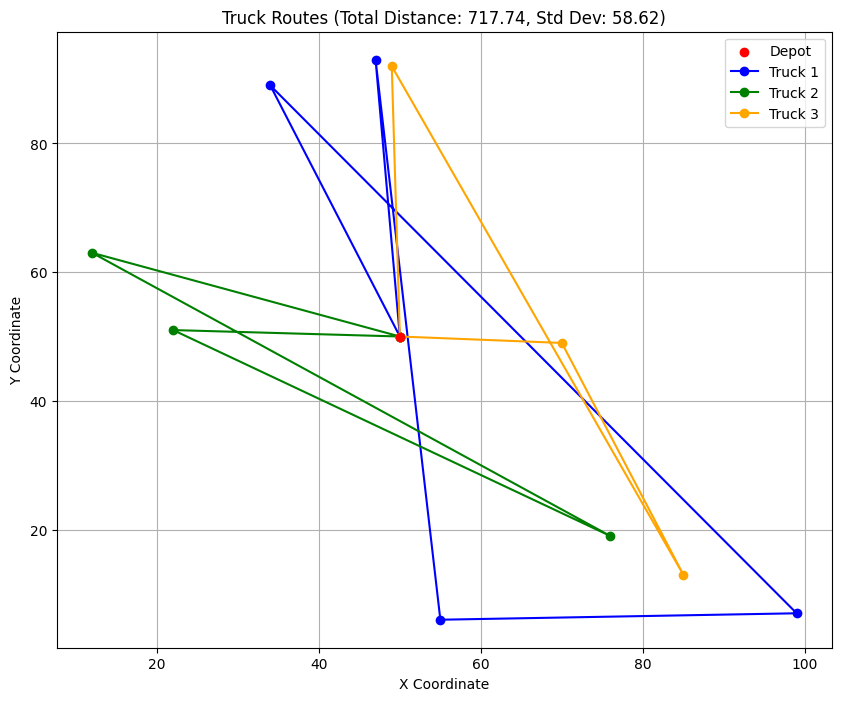

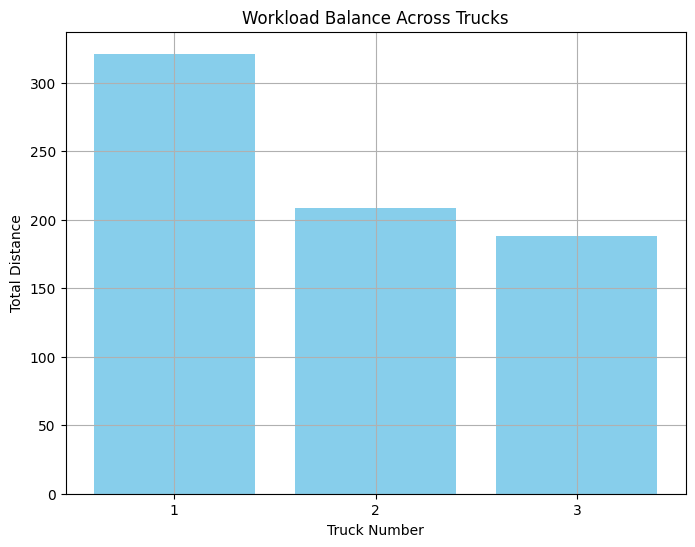

In [16]:
def visualize_workload_balance():
    """Visualizes the distribution of distances across trucks."""
    truck_routes = np.array_split(individual, num_vehicles)
    truck_distances = []

    for route in truck_routes:
        distance = 0
        prev_location = depot

        for idx in route:
            distance += calculate_distance(prev_location, locations[idx])
            prev_location = locations[idx]

        distance += calculate_distance(prev_location, depot)
        truck_distances.append(distance)

    # Plot the workload balance (distances per truck)
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, num_vehicles + 1), truck_distances, color='skyblue')
    plt.title('Workload Balance Across Trucks')
    plt.xlabel('Truck Number')
    plt.ylabel('Total Distance')
    plt.xticks(range(1, num_vehicles + 1))
    plt.grid(True)
    plt.show()

# --- Visualize the results ---
visualize_routes(individual)  # Visualize the routes
visualize_workload_balance()  # Visualize workload balance